<a href="https://colab.research.google.com/github/Surekha-10-2000/My-first-project/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign for Banking Products

**1.Importing the required libraries for EDA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.csv to Bank_Personal_Loan_Modelling.csv


In [ ]:
import io
!pip install -q xlrd
#df = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling.xlsx']))
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**1.2 Checking the types of data and basic summary stats**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**2.Dropping irrelevant columns**

In [ ]:
experience=df["Experience"]
age=df["Age"]
correlation=experience.corr(age)
correlation

0.9942148569683321

In [ ]:
df=df.drop(["ID","Experience"],axis=1)
df.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows ", duplicate_rows_df)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [ ]:
df = df.dropna()
df.count()

Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
print(df.isnull().sum())

Age                   0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**3.EDA**

In [ ]:
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [ ]:
df.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [ ]:
(df.Mortgage==0).sum()

3462

In [ ]:
(df.CCAvg==0).sum()

106

In [ ]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**Univariate**

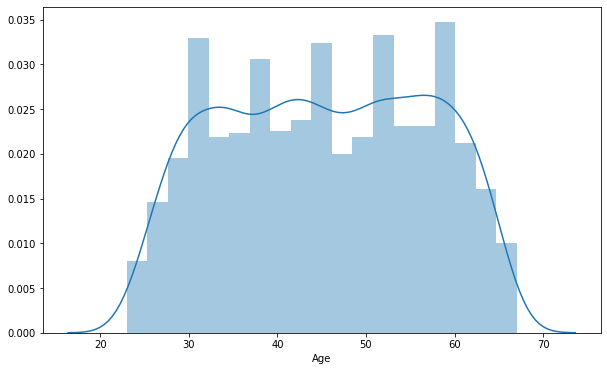

In [ ]:
sns.distplot(df.Age)

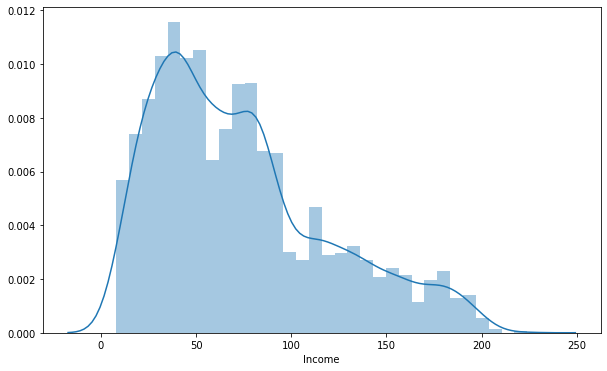

In [ ]:
sns.distplot(df.Income)

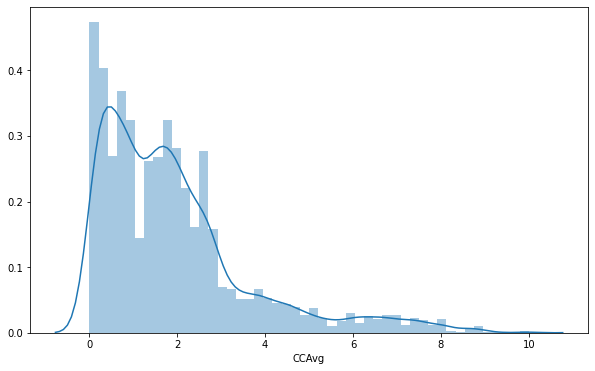

In [ ]:
sns.distplot(df.CCAvg)

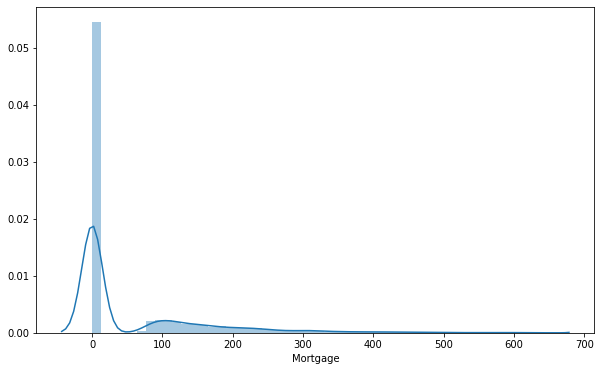

In [ ]:
sns.distplot(df.Mortgage)

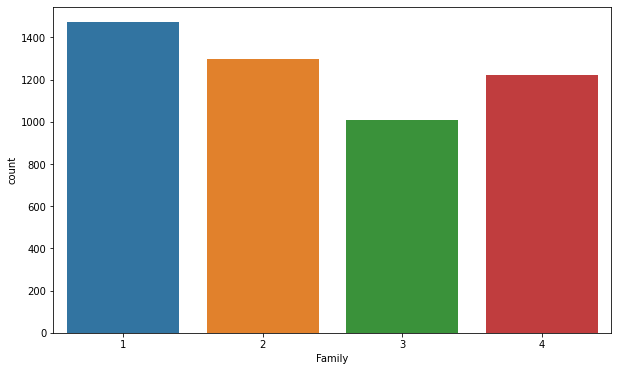

In [ ]:
sns.countplot(df.Family)

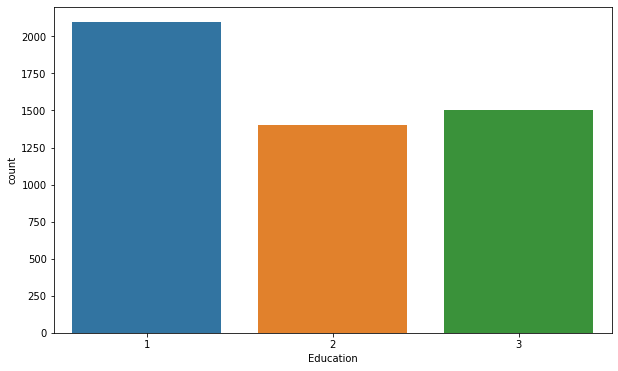

In [ ]:
sns.countplot(df.Education)

**Multivariate**

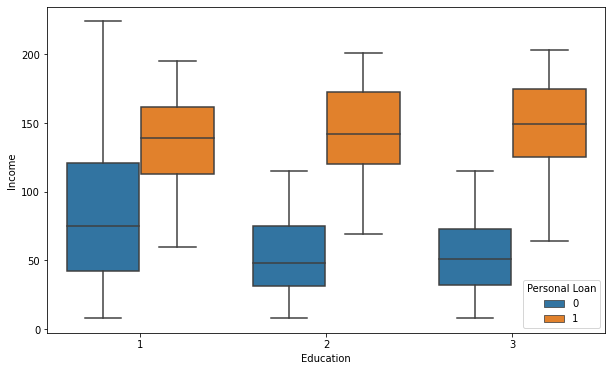

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

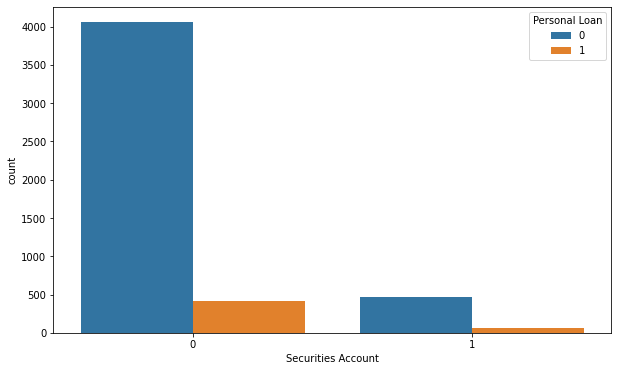

In [ ]:
sns.countplot(x='Securities Account',data=df,hue='Personal Loan')

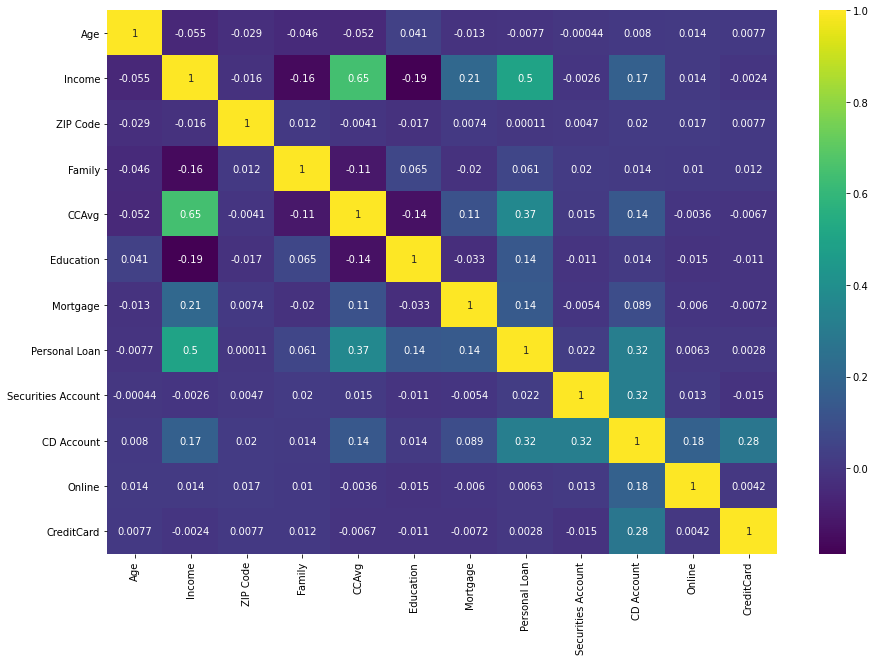

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True);

In [ ]:
datax=df.loc[:, df.columns != "Personal Loan"]
datay=df["Personal Loan"]

In [ ]:
datax.shape,datay.shape

((5000, 11), (5000,))

In [ ]:
datax.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1


**4.Transformation for the feature variables**

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["Income"].values.reshape(-1,1))
t = pt.transform(datax["Income"].values.reshape(-1,1))

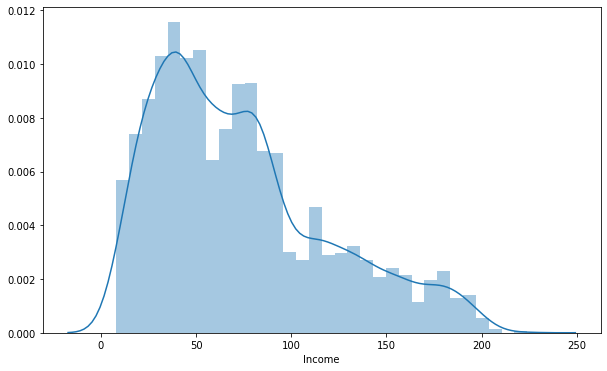

In [ ]:
sns.distplot(df.Income)

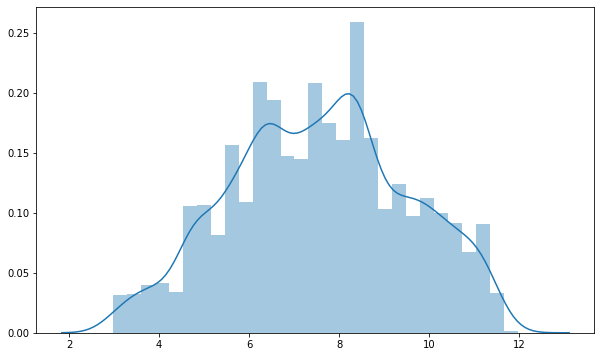

In [ ]:
sns.distplot(t)

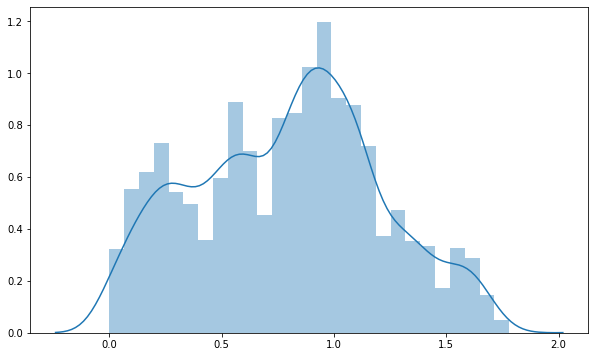

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(datax["CCAvg"].values.reshape(-1,1))
t = pt.transform(datax["CCAvg"].values.reshape(-1,1))
sns.distplot(t)

In [ ]:
datax['Mortgage_int'] = pd.cut(datax.Mortgage,
                               bins=[0,100,200,300,400,500,600,700],
                               labels=[0,1,2,3,4,5,6],
                               include_lowest=True)
datax.drop('Mortgage', axis=1, inplace=True)

In [ ]:
datax.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


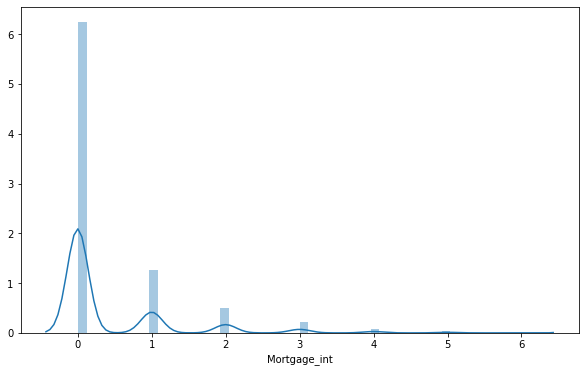

In [ ]:
sns.distplot(datax.Mortgage_int)

**5.splitting data tarining and test  set**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(datax, datay, test_size =0.3, stratify = datay, random_state=0)

**6.using logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=1000)
log_reg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
class_names = ['will not take loan', 'take loan']

Training Accuracy: 0.91
Testing Accuracy: 0.91
Precision: 0.56
Recall: 0.33


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

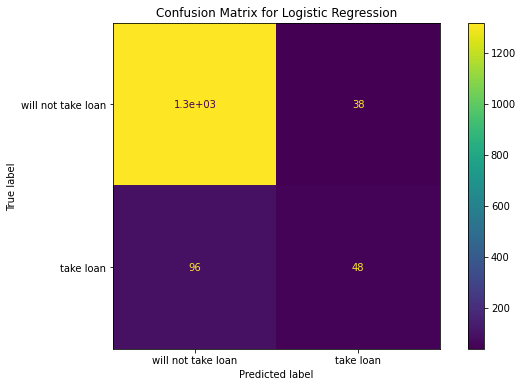

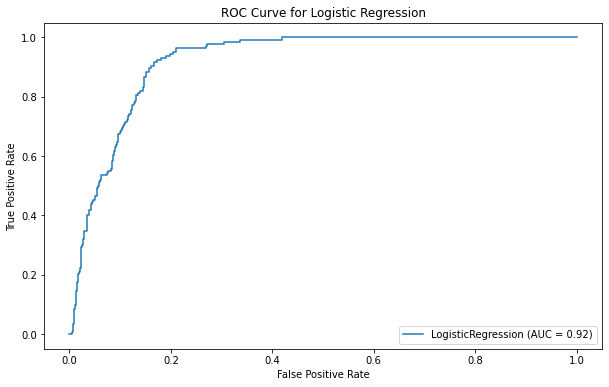

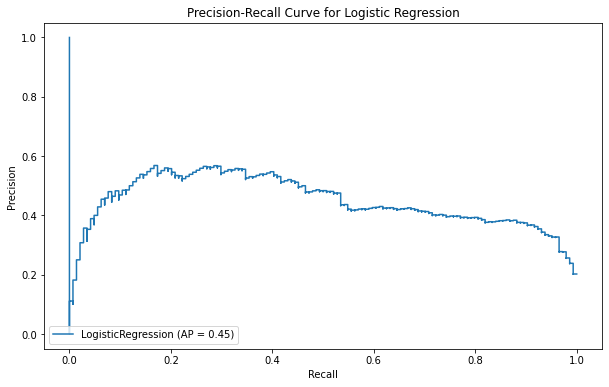

In [ ]:
train_score = log_reg.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))
#used for prediction
y_pred_logi = log_reg.predict(test_x)

precision_logi = precision_score(test_y, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(test_y, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, test_x, test_y, display_labels=class_name)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, test_x, test_y)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, test_x, test_y)
plt.title('Precision-Recall Curve for Logistic Regression')

**random forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=7,n_jobs=-1, random_state=1 )
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Training Accuracy: 0.99
Testing Accuracy: 0.99
Precision: 1.0
Recall: 0.86


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

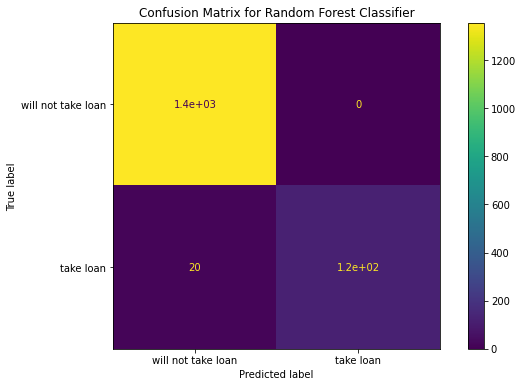

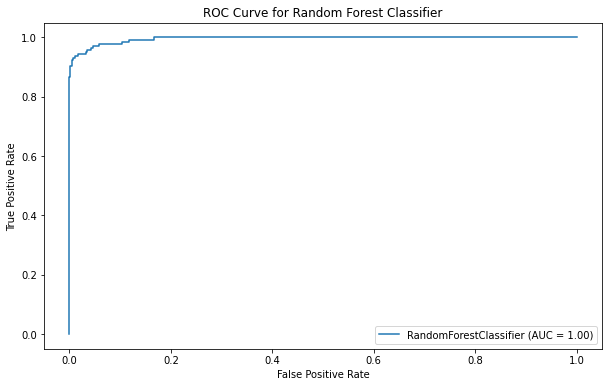

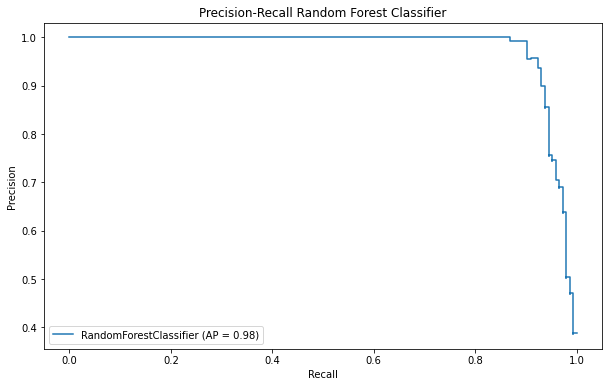

In [ ]:
train_score = rfc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = rfc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rfc.predict(test_x)

precision_rf = precision_score(test_y, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(test_y, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rfc, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rfc, test_x, test_y)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rfc, test_x, test_y)
plt.title('Precision-Recall Random Forest Classifier')

**Karnott nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(train_x,train_y)
y_pred=k.predict(test_x)

Training Accuracy: 0.92
Testing Accuracy: 0.9
Precision: 0.49
Recall: 0.2


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

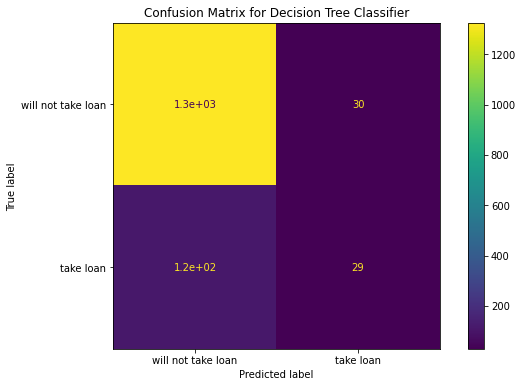

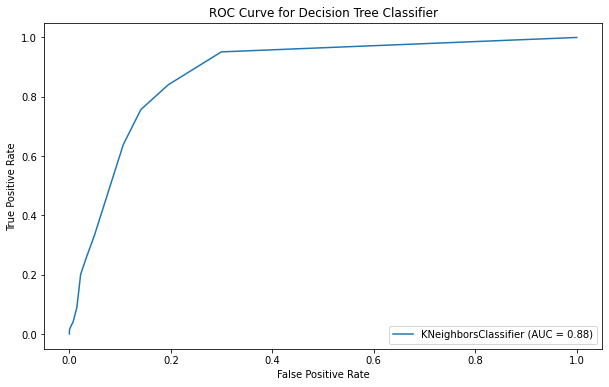

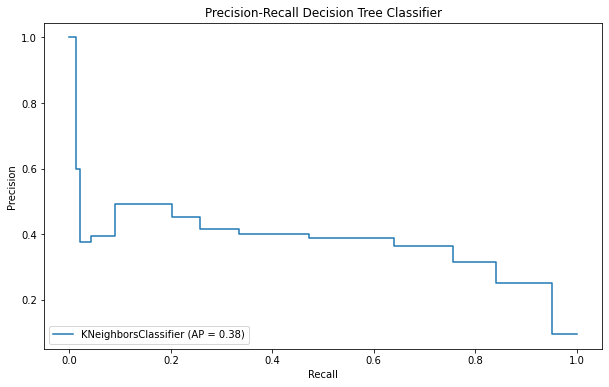

In [ ]:
train_score = k.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')

**Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred=dtc.predict(test_x)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.88
Recall: 0.9


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

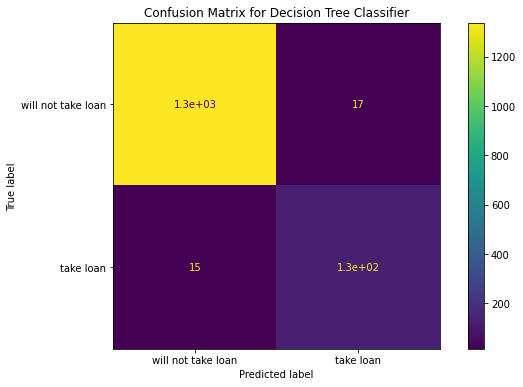

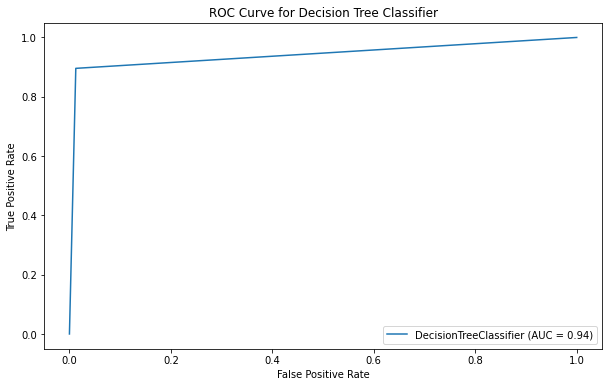

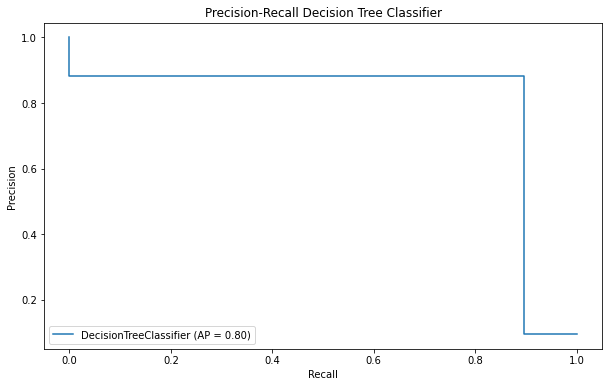

In [ ]:
train_score = dtc.score(train_x, train_y)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(test_x, test_y)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(test_y, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(test_y, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, test_x, test_y, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, test_x, test_y)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, test_x, test_y)
plt.title('Precision-Recall Decision Tree Classifier')